# Homework 2
#### EE-556 Mathematics of Data - Fall 2024

This homework covers Lectures 8-12. Please take a look at the material for the context and notation.

In this homework we will study minimax problems. We will begin with some theoretical analysis and in a second part you will implement a Wasserstein Generative Adversarial Network (WGAN). 

These notebooks should expose you to the fundamentals of GAN training at a basic level, as well as some of the theory behind it.

## 1. Minimax problems - 65 points

### 1.1 Theoretical recap: stationary points and convergence in minmax games - 25 points

Consider a stylized function $f:\mathbb{R}^4 \to \mathbb{R}$ with variables $x_1,x_2,y_1,y_2$, we denote by
$x=(x_1,x_2) \in \mathbb{R}^2$, $y=(y_1,y_2) \in \mathbb{R}^2$, the function has the form of
$
f(x,y) = (a x - b)^\top (a y - c), \quad a \neq 0, \; b,c \in \mathbb{R}^2.
$


__(1)__ (5 points) Write down the first-order stationary points of $f$, and
        classify them as local minimum, local maximum, or saddle point by
        inspecting its Hessian.




We recall the definition of first-order stationary points:

A point $\bar{x}$ is a first-order stationary point of a twice differentiable function $f$ if  

$$\nabla f(\bar{x}) = 0.$$

Also, recall the following:

Let $\bar{x}$ be a stationary point of a twice differentiable function $f$.

1. If $\nabla^2 f(\bar{x}) \succ 0$, then the point $\bar{x}$ is called a local minimum or a second order stationary point (SOSP).
2. If $\nabla^2 f(\bar{x}) \prec 0$, then the point $\bar{x}$ is called a local maximum.
3. If $\nabla^2 f(\bar{x}) = 0$, then the point $\bar{x}$ can be a saddle point, a local minimum, or a local maximum.


$f(x,y) = (ax - b)^T (ay - c)
= \begin{bmatrix} a x_1 - b_1 & a x_2 - b_2 \end{bmatrix}
  \begin{bmatrix} a y_1 - c_1 \\ a y_2 - c_2 \end{bmatrix}=$

$= (a x_1 - b_1)(a y_1 - c_1) + (a x_2 - b_2)(a y_2 - c_2)=$

$= a^2 x_1 y_1 - a x_1 c_1 - a b_1 y_1 + b_1 c_1
  + a^2 x_2 y_2 - a x_2 c_2 - a b_2 y_2 + b_2 c_2$

$\dfrac{\partial f}{\partial x_1} = a^2 y_1 - a c_1$

$\dfrac{\partial f}{\partial x_2} = a^2 y_2 - a c_2$

$\nabla_x f(x,y) =
\begin{pmatrix}
a^2 y_1 - a c_1 \\
a^2 y_2 - a c_2
\end{pmatrix}$

$\dfrac{\partial f}{\partial y_1} = a^2 x_1 - a b_1$

$\dfrac{\partial f}{\partial y_2} = a^2 x_2 - a b_2$

$\nabla_y f(x,y) =
\begin{pmatrix}
a^2 x_1 - a b_1 \\
a^2 x_2 - a b_2
\end{pmatrix}$


For the derivative we have

$$
\nabla f(x,y)
=
\big( \nabla_x f(x,y),\ \nabla_y f(x,y) \big)
$$

$$
=
\begin{pmatrix}
a^2 y_1 - a c_1 & a^2 x_1 - a b_1 \\
a^2 y_2 - a c_2 & a^2 x_2 - a b_2
\end{pmatrix}
$$

$$
=
\big( a^2 y - a c,\ \ a^2 x - a b \big)
$$


To find the stationary points we need to calculate $\nabla f(x,y) = 0$.

This means that

$$
a^2 y - a c = 0
$$

$$
a^2 x - a b = 0
$$

By solving this we get

$$
y^\star = \frac{1}{a} c
\qquad\text{and}\qquad
x^\star = \frac{1}{a} b
$$

So the first order stationary point is 

$$
(x^\star, y^\star) = \left( \frac{b}{a}, \frac{c}{a} \right)
$$

Now we need to evaluate the Hessian. We start fromt the block $H_{xy}$.

Recall: 

$\nabla_x f(x,y) =
\begin{pmatrix}
a^2 y_1 - a c_1 \\
a^2 y_2 - a c_2
\end{pmatrix}$

Now we need to differentiate this with respect to $y=(y_1,y_2)$

$\dfrac{\partial^2 f}{\partial x_1 \partial y_1}
= \dfrac{\partial}{\partial y_1}(a^2 y_1 - a c_1) = a^2$

$\dfrac{\partial^2 f}{\partial x_1 \partial y_2}
= \dfrac{\partial}{\partial y_2}(a^2 y_1 - a c_1) = 0$

$\dfrac{\partial^2 f}{\partial x_2 \partial y_1}
= \dfrac{\partial}{\partial y_1}(a^2 y_2 - a c_2) = 0$

$\dfrac{\partial^2 f}{\partial x_2 \partial y_2}
= \dfrac{\partial}{\partial y_2}(a^2 y_2 - a c_2) = a^2$

$H_{xy} =
\begin{bmatrix}
a^2 & 0 \\
0   & a^2
\end{bmatrix}
= a^2 I_2$

The same we apply to get $H_{yx}$.

$\nabla_y f(x,y) =
\begin{pmatrix}
a^2 x_1 - a b_1 \\
a^2 x_2 - a b_2
\end{pmatrix}$

$\dfrac{\partial^2 f}{\partial y_1 \partial x_1}
= \dfrac{\partial}{\partial x_1}(a^2 x_1 - a b_1) = a^2$

$\dfrac{\partial^2 f}{\partial y_1 \partial x_2}
= \dfrac{\partial}{\partial x_2}(a^2 x_1 - a b_1) = 0$

$\dfrac{\partial^2 f}{\partial y_2 \partial x_1}
= \dfrac{\partial}{\partial x_1}(a^2 x_2 - a b_2) = 0$

$\dfrac{\partial^2 f}{\partial y_2 \partial x_2}
= \dfrac{\partial}{\partial x_2}(a^2 x_2 - a b_2) = a^2$

So we have
$H_{yx} =
\begin{bmatrix}
a^2 & 0 \\
0   & a^2
\end{bmatrix}
= a^2 I_2$

As $\nabla_x f(x,y)$ does not depend on $x$ we have

$H_{xx} =
\begin{bmatrix}
0 & 0 \\
0 & 0
\end{bmatrix}$

The same for $\nabla_y f(x,y)$. It does not depend on $y$ so

$H_{yy} =
\begin{bmatrix}
0 & 0 \\
0 & 0
\end{bmatrix}$

Combining these blocks in Hessian we have

$H =
\begin{bmatrix}
0_2      & a^2 I_2 \\
a^2 I_2  & 0_2
\end{bmatrix}$

Now we need to check whether $H$ is positive /
negative definite or indefinite.

We take generic vector $z = (x, y) \in \mathbb{R}^2$

$$
z^T H z =
\begin{bmatrix} x^T & y^T \end{bmatrix}
\begin{bmatrix}
0 & a^2 I_2 \\
a^2 I_2 & 0
\end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}
$$

$$
=
\begin{bmatrix} x_1 & x_2 & y_1 & y_2 \end{bmatrix}
\begin{bmatrix}
0 & 0 & a^2 & 0 \\
0 & 0 & 0 & a^2 \\
a^2 & 0 & 0 & 0 \\
0 & a^2 & 0 & 0
\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ y_1 \\ y_2 \end{bmatrix}
$$

$$
= a^2(x_1 y_1 + x_2 y_2) + a^2(x_1 y_1 + x_2 y_2)
$$

$$
= 2 a^2 (x_1 y_1 + x_2 y_2) = 2 a^2 x^T y
$$

For $x = y \neq 0$

$$
z^T H z = 2 a^2 x^T x = 2 a^2 |x|^2 > 0
$$

For $x = -y$

$$
z^T H z = 2 a^2 x^T (-x) = - 2 a^2 |x|^2 < 0
$$

From this we can conclude that the matrix
is neither positive nor negative definite as it
gives both positive and negative values depending on $x$.

Therefore we can conclude that the stationary point $(x^\star, y^\star) = \left( \frac{b}{a}, \frac{c}{a} \right)$ is a **saddle point**.


__(2)__ (5 points) Find the solution $(x^\star,y^\star)$ to the
        minimax problem $\min_x \max_y f(x, y)$. You can quantify the solution
        by using the following saddle point inequality:  $f(x^\star, y^\star)
        \geq f(x^\star, y)$ and $f(x^\star, y^\star) \leq f(x, y^\star)$, for
        all $x, y$.
        
**HINT:** $(x^\star, y^\star)$ can only be one of the critical points you found in (1), just evaluate $f$ at every place in the inequalities to check the optimality!


Let us evaluate the value of $f(x,y)$ in the saddle point.

$$
f(x^, y^) = f\left( \tfrac{b}{a}, \tfrac{c}{a} \right)
= (a \tfrac{b}{a} - b)^T (a \tfrac{c}{a} - c) = 0
$$

Now we can check $f(x^*, y)$ for any $y$.

$$
f(x^*, y) = f\left( \tfrac{b}{a}, y \right)
= (a \tfrac{b}{a} - b)^T (a y - c) = 0
$$

Therefore we have that

$$
f(x^, y^) \ge f(x^*, y) \qquad \forall\, y
$$

as $0 = 0$.

So at $x^\star$ every $y$ gives the same value of $0$ and we can see that $y^\star$ is
indeed a maximizer at $f(x^\star, y)$.



Now we can check $f(x, y^\star)$ for any $x$.

$$
f(x, y^*) = f\left( x, \tfrac{c}{a} \right)
= (a x - b)^T (a \tfrac{c}{a} - c) = 0
$$

Therefore we have that

$$
f(x^\star, y^\star) \le f(x, y^\star) \qquad \forall\, x
$$

as $0 = 0$.

So $x^\star$ is indeed a minimizer of $f(x, y^\star)$.


For $(x^\star, y^\star)$ we indeed have

$$
f(x^\star, y) \le f(x^\star, y^\star) \le f(x, y^\star) \qquad \forall x, y
$$

as all terms are equal to zero.

Therefore the solution to

$$
\min_x \max_y f(x,y)
$$

is

$$
(x^\star, y^\star) = \left( \tfrac{b}{a},\ \tfrac{c}{a} \right).
$$


__(3)__ (15 points) One possible attempt at finding this solution via iterative
        first-order methods is to perform gradient updates on the variables $x$
        and $y$. More precisely for $\gamma > 0$ consider the simultaneous gradient
        descent/ascent updates
        
\begin{equation}
    x^{k+1} = x^k - \gamma \nabla_x f(x^k, y^k), \qquad
    y^{k+1} = y^k + \gamma \nabla_y f(x^k, y^k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x^k, y^k \}_{k=0}^\infty$ starting
from any point $(x^0, y^0) \neq (x^\star, y^\star)$ diverges, for any $\gamma > 0$.
Find the rate at which the distance from 
$(x^\star,y^\star)$ to the sequence $\{x^k, y^k \}$ grows as the number of iterations $k$ increases.

**HINT:** Define $d_k^2=||(x^k,y^k)-(x^\star, y^\star)||_2^2$ as the sequence of squared distances to the optimum. If you find a formula for how $d_{k+1}$ depends on $d_k$ using the exact gradient updates for our $f$, you can easily argue for the divergence and the rate.

Let's expand $d_k^2$:

$$
d_k^2 = \|(x^{k}, y^{k}) - (x^\star, y^\star)\|_2^2
$$

$$
= \|(x^k - x^\star) + (y^\star - y^k)\|_2^2
$$

$$
= \|x^k - x^\star\|_2^2 + \|y^k - y^\star\|_2^2
$$

$$
= (x_1^k - x_1^\star)^2 + (x_2^k - x_2^\star)^2 
  + (y_1^k - y_1^\star)^2 + (y_2^k - y_2^\star)^2
$$

Now let us calculate $d_{k+1}^2$.

Recall:

$$
\nabla_x f(x,y) = 
\begin{pmatrix}
a^2 y_1 - a c_1 \\
a^2 y_2 - a c_2
\end{pmatrix}
$$

$$
\nabla_y f(x,y) = 
\begin{pmatrix}
a^2 x_1 - a b_1 \\
a^2 x_2 - a b_2
\end{pmatrix}
$$

$$
d_{k+1}^2 = \|(x^{k} - y^{k+1}) - (x^\star - y^\star)\|_2^2
$$

$$
= \|(x^k - \gamma \nabla_x f(x^k,y^k) - x^\star),
    (y^k - y^\star + \gamma \nabla_y f(x^k,y^k))\|_2^2
$$

$$
= \|x^k - x^\star - \gamma \nabla_x f(x^k,y^k)\|_2^2 
  + \|y^k - y^\star + \gamma \nabla_y f(x^k,y^k)\|_2^2
$$

$$
= (x_1^k - x_1^\star - \gamma(a^2 y_1^k - a c_1))^2
+ (x_2^k - x_2^\star - \gamma(a^2 y_2^k - a c_2))^2
$$

$$
\quad + (y_1^k - y_1^\star + \gamma(a^2 x_1^k - a b_1))^2
+ (y_2^k - y_2^\star + \gamma(a^2 x_2^k - a b_2))^2
$$




For simplicity let's denote

$$
(x_1^k - x_1^\star) = d_{x_1}^k, \qquad
(x_2^k - x_2^\star) = d_{x_2}^k,
$$

$$
(y_1^k - y_1^\star) = d_{y_1}^k, \qquad
(y_2^k - y_2^\star) = d_{y_2}^k
$$

Now we have that:

$$
d_k^2 = (d_{x_1}^k)^2 + (d_{x_2}^k)^2 + (d_{y_1}^k)^2 + (d_{y_2}^k)^2
$$

And:

$$
d_{k+1}^2 =
(d_{x_1}^k - \gamma(a^2 y_1^k - a c_1))^2
+ (d_{x_2}^k - \gamma(a^2 y_2^k - a c_2))^2
$$

$$
\quad + (d_{y_1}^k + \gamma(a^2 x_1^k - a b_1))^2
+ (d_{y_2}^k + \gamma(a^2 x_2^k - a b_2))^2
$$

$$
= (d_{x_1}^k)^2 + (d_{x_2}^k)^2 + (d_{y_1}^k)^2 + (d_{y_2}^k)^2
$$

$$
+ \gamma^2 \left[(a^2 y_1^k - a c_1)^2 + (a^2 y_2^k - a c_2)^2
+ (a^2 x_1^k - a b_1)^2 + (a^2 x_2^k - a b_2)^2\right]
$$

$$
+ 2\gamma\left[d_{y_1}^k(a^2 x_1^k - a b_1)
+ d_{y_2}^k(a^2 x_2^k - a b_2)
- d_{x_1}^k(a^2 y_1^k - a c_1)
- d_{x_2}^k(a^2 y_2^k - a c_2)\right]
$$

$$
= d_k^2  +
$$
$$
+ \gamma^2 \left[(a^2 y_1^k - a c_1)^2 + (a^2 y_2^k - a c_2)^2
+ (a^2 x_1^k - a b_1)^2 + (a^2 x_2^k - a b_2)^2\right]
$$

$$
+ 2\gamma\left[d_{y_1}^k(a^2 x_1^k - a b_1)
+ d_{y_2}^k(a^2 x_2^k - a b_2)
- d_{x_1}^k(a^2 y_1^k - a c_1)
- d_{x_2}^k(a^2 y_2^k - a c_2)\right]
$$



Note that:

$$
x^\star = \frac{b}{a} = \begin{pmatrix} b_1/a \\ b_2/a \end{pmatrix}
$$

$$
y^\star = \frac{c}{a} = \begin{pmatrix} c_1/a \\ c_2/a \end{pmatrix}
$$

From there:

$$
a^2 x_1^k - a b_1 = a^2(x_1^k - x_1^\star) = a^2 d_{x_1}^k
$$

$$
a^2 x_2^k - a b_2 = a^2(x_2^k - x_2^\star) = a^2 d_{x_2}^k
$$

$$
a^2 y_1^k - a c_1 = a^2(y_1^k - y_1^\star) = a^2 d_{y_1}^k
$$

$$
a^2 y_2^k - a c_2 = a^2(y_2^k - y_2^\star) = a^2 d_{y_2}^k
$$


Now we have

$$
d_{k+1}^2
= d_k^2
+ \gamma^2 a^4\big[(d_{x_1}^k)^2 + (d_{x_2}^k)^2 + (d_{y_1}^k)^2 + (d_{y_2}^k)^2\big]
$$

$$
\quad + 2\gamma\big(
d_{y_1}^k \cdot a^2 d_{x_1}^k
+ d_{y_2}^k \cdot a^2 d_{x_2}^k
- d_{x_1}^k \cdot a^2 d_{y_1}^k
- d_{x_2}^k \cdot a^2 d_{y_2}^k
\big) = 
$$


$$
= d_k^2
+ \gamma^2 a^4\big[(d_{x_1}^k)^2 + (d_{x_2}^k)^2 + (d_{y_1}^k)^2 + (d_{y_2}^k)^2\big] = 
$$

$$
= d_k^2 + a^4\gamma^2 d_k^2
= d_k^2(1 + a^4\gamma^2)
$$

Finally, we conclude that  

$$
d_{k+1}^2 = (1 + a^4\gamma^2)\, d_k^2 .
$$

Since $a^4\gamma^2 \ge 0$, we have $1 + a^4\gamma^2 \ge 1$, and if $a\gamma \neq 0$ (which is the case) then
$1 + a^4\gamma^2 > 1$. Therefore  

$$
d_{k+1}^2 = (1 + a^4\gamma^2)\, d_k^2 > d_k^2,
$$

so the squared distance from $(x^\star, y^\star)$ grows without bound and the sequence
$\{(x^k,y^k)\}$ diverges.

Since
$$
d_{k+1} = \sqrt{1 + a^4\gamma^2}\, d_k ,
$$
the distance from $(x^\star, y^\star)$ grows at rate  

$$
\sqrt{1 + a^4\gamma^2},
$$

while the squared distance grows at rate  

$$
1 + a^4\gamma^2.
$$


__(Optional $\star$)__ A second attempt at finding the solution via _alternating_ gradient descent ascent on $x$
        and $y$. More precisely for $\gamma > 0$ consider the update
        
\begin{equation}
    x^{k+1} = x^k - \gamma \nabla_x f(x^k, y^k), \qquad
    y^{k+1} = y^k + \gamma \nabla_y f(x^{k+1}, y^k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x^k, y^k \}_{k=0}^\infty$ starting
from any point $(x^0, y^0) \neq (x^\star, y^\star)$ i) never converges, ii) but still remains bounded under certain stepsize conditions.


Note: in this example, for simplicity just consider $f:\mathbb{R}^2 \to \mathbb{R}$ with variables $x,y$, where
$x, y \in \mathbb{R}$, the function has the form of
$
f(x,y) = (a x - b) (a y - c), \quad a \neq 0, \; b,c \in \mathbb{R}.
$


**HINT**: Reduce the problem to studying a linear system.


We consider the function  

$$
f(x,y) = (ax - b)(ay - c) = a^2xy - acx - aby + bc.
$$

We have  

$$
\partial_x f(x,y) = a^2 y - ac, \qquad
\partial_y f(x,y) = a^2 x - ab.
$$

The saddle point is  

$$
(x^\star, y^\star) = \left(\frac{b}{a}, \frac{c}{a}\right).
$$

We define  

$$
d x = x - x^\star, \qquad d y = y - y^\star.
$$


Using the alternating update we get  

$$
d x^{k+1} = x^{k+1} - x^\star 
= x^k - \gamma (a^2 y^k - ac) - x^\star
= d x^k - \gamma a^2 d y^k,
$$

and  

$$
d y^{k+1} = y^{k+1} - y^\star
= y^k + \gamma (a^2 x^{k+1} - ab) - y^\star
= d y^k + \gamma a^2 d x^{k+1}.
$$

By plugging in $d x^{k+1}$ in $d y^{k+1}$ we get  

$$
d y^{k+1}
= d y^k + \gamma a^2 (d x^k - \gamma a^2 d y^k)
= (1 - a^4 \gamma^2) d y^k + a^2 \gamma d x^k.
$$

Hence we can write the system as  

$$
\begin{pmatrix}
d x^{k+1} \\
d y^{k+1}
\end{pmatrix}
=
\begin{pmatrix}
1 & -a^2 \gamma \\
a^2 \gamma & 1 - a^4 \gamma^2
\end{pmatrix}
\begin{pmatrix}
d x^{k} \\
d y^{k}
\end{pmatrix}.
$$

Let  

$$
M =
\begin{pmatrix}
1 & -a^2 \gamma \\
a^2 \gamma & 1 - a^4 \gamma^2
\end{pmatrix}, \qquad
z^k =
\begin{pmatrix}
d x^{k} \\
d y^{k}
\end{pmatrix}.
$$

Then  

$$
z^{k+1} = M z^k.
$$

If it converges to some $z_c$ then it holds  

$$
z_c = M z_c,
$$

which means that $z_c$ is the eigenvector of $M$ with eigenvalue $1$.  
Let us look at the eigenvalues of $M$.

We can plug in the value $1$ in the characteristic equation. We compute  

$$
\det(M - I)
=
\begin{vmatrix}
1-1 & -a^2\gamma \\
a^2\gamma & 1 - a^4\gamma^2 - 1
\end{vmatrix}
=
\begin{vmatrix}
0 & -a^2\gamma \\
a^2\gamma & -a^4\gamma^2
\end{vmatrix}
= a^4\gamma^2.
$$

For $a \neq 0$ and $\gamma > 0$ this cannot be $0$.  
Therefore the only chance for the sequence to converge is to be $z_c = 0$.

Now let us look at the behaviour of the sequence

$$
z^k = M^k z^0.
$$

The convergence happens only if all eigenvalues of $M$ satisfy $|\lambda_i| < 1$.
Boundedness if $|\lambda_i| \le 1$.
Divergence if one of them is greater than $1$ in absolute value.

We compute the characteristic equation

$$
\det(M - \lambda I) = 0,
$$
 

$$
\begin{vmatrix}
1-\lambda & -a^2\gamma \\
a^2\gamma & 1 - a^4\gamma^2 - \lambda
\end{vmatrix}
= 0.
$$
 

$$
\lambda^2 + \lambda(a^4\gamma^2 - 2) + 1 = 0.
$$

The discriminant is  

$$
B^2 - 4AC
= (a^4\gamma^2 - 2)^2 - 4
= a^8\gamma^4 - 4a^4\gamma^2 + 4 - 4
= a^4\gamma^2(a^4\gamma^2 - 4).
$$

If  

$$
a^4\gamma^2(a^4\gamma^2 - 4) < 0
$$

then  

$$
a^4\gamma^2 < 4, \qquad |a^2\gamma| < 2,
$$

and $\lambda_1$ and $\lambda_2$ are complex conjugate.

Plus we have  

$$
\lambda_1\lambda_2 = |M| = 1
$$

so  

$$
|\lambda_1|^2 = 1 \quad\Rightarrow\quad
|\lambda_1| = |\lambda_2| = 1.
$$

Hence $|\lambda_1| = |\lambda_2| = 1 \Rightarrow$ it doesn’t converge, but it is bounded.

For $|a^2\gamma| > 2$ the eigenvalues are real, and because  

$$
\lambda_1\lambda_2 = 1,
$$

one of them is bigger than $1$, so the sequence diverges.

Thus for the boundedness we need  

$$
a^2\gamma < 2
\qquad\Rightarrow\qquad
\gamma < \frac{2}{a^2}.
$$

### 1.2 A concrete example: Rock - Paper - Scissors - Lizard - Spock - 40 points

To make your previous abstract analysis more concrete, we will now look at the iconic Rock-Paper-Scissors-Lizard-Spock game. Sheldon and Leonard always like to settle their differences through a round of this game, whose rules they state as follows:

*"Scissors cuts Paper, Paper covers Rock, Rock crushes Lizard, Lizard poisons Spock, Spock smashes Scissors, Scissors decapitates Lizard, Lizard eats Paper, Paper disproves Spock, Spock vaporizes Rock, (and as it always has) Rock crushes Scissors"*

Sheldon and Leonard always pick to play Spock because "logic trumps all", it will be your task to show that this is not the optimal strategy.

We can formalize the game as follows. There are two players, the `x` player (e.g. Sheldon) and the `y` player (e.g. Leonard). There is only one single round. The players play a randomized strategy: each player chooses a probability of playing rock/paper/scissors/lizard/Spock. We look at the expected pay-off of these randomized strategies. 

In other words, the players choose an element in $\Delta_5$ the probability simplex in dimension 5. The `x` player chooses a vector $\mathbf{x} = \begin{bmatrix} \mathbf{x}_1 & \mathbf{x}_2 & \mathbf{x}_3 & \mathbf{x}_4 & \mathbf{x}_5 \end{bmatrix} \in \Delta_5$ where $\mathbf{x}_1$ is the probability of playing `Rock`, $\mathbf{x}_2$ is the probability of playing `Paper`, $\mathbf{x}_3$ is the probability of playing `Scissors`, $\mathbf{x}_4$ is the probability of playing `Lizard`, $\mathbf{x}_5$ is the probability of playing `Spock`. The `y` player chooses a vector $\mathbf{y} \in \Delta_5$ defined in the same way. 

The game designers decide that winning the game gives 1 point and a tie gives 0 points. So the expected payoff for a give choice of strategies $\mathbf{x}, \mathbf{y}$ is obtained by computing:
$$
\mathbf{x}^\top \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}\mathbf{y}
$$

The `x` player wants to minimize this expected payoff and the `y` player wants to maximize it. So the problem we seek to solve is

$$
\min_{\mathbf{x} \in \Delta_5} \max_{\mathbf{y} \in \Delta_5} \mathbf{x}^\top \mathbf{M}\mathbf{y} =: f(\mathbf{x}, \mathbf{y})
$$
with $\mathbf{M} = \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}$.

In the following cells, you will implement methods to solve this game and find the optimal strategies.

In [1]:
import torch
from ipywidgets import interact, SelectionSlider, fixed
from itertools import combinations
from scipy.stats import entropy
from lib.utils import *

c:\Users\Master\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


**(1)** (2 points) Implement the objective function $f$ given two 3 dimensional vectors `x` and `y` stored as `torch.Tensor` objects.

In [2]:
M = torch.tensor([[ 0,  1, -1, -1,  1],
                  [-1,  0,  1,  1, -1],
                  [ 1, -1,  0, -1,  1],
                  [ 1, -1,  1,  0, -1],
                  [-1,  1, -1,  1,  0]]).float()
def f(x: torch.Tensor, y: torch.Tensor):
    return x @ M @ y

**(2)** (10 points) Implement a single step of the simultaneous gradient descent/ascent studied in question 1.1.(3). Since we are in a constrained setting, make sure you include a projection step onto the simplex. 

The function `GDA` you will implement takes in the objective function `f`, the two current strategies of the players stored in tensors `x` and `y` and a step_size. Write the function so that it modifies the variables `x` and `y` in place without returning anything.

We provide you with a function called `simplex_project` that projects a vector on the probability simplex. The function has no return value and does the projection in place. Use `Pytorch` to compute gradients automatically. 

__Hints__: Review what a call to `.backward()` on a tensor does. Review what in-place operations are like `.add_`. Think of which steps need to be in a `with torch.no_grad()` block. Remember to zero the gradients before re-using them.

In [3]:
def GDA(f, x, y, step_size):
    x.grad = None
    y.grad = None
    
    payoff = f(x, y)
    
    payoff.backward()

    grad_x = x.grad
    grad_y = y.grad

    with torch.no_grad():
        x.add_(-step_size * grad_x)
        simplex_project(x)
        y.add_(step_size * grad_y)
        simplex_project(y)



We can run this algorithm initialized from Sheldon and Leonard's strategies of always playing Spock.

In [4]:
x_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])
y_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])


gda_x_sequence, gda_y_sequence = run_alg(GDA, f, x_init, y_init, step_size=0.05, n_iterations=2500)

c:\Users\Master\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\autograd\graph.py:823: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11060). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\c10\cuda\CUDAFunctions.cpp:109.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


We can visualize this sequence as ${4 \choose 2} = 6$ two dimensional slices since the simplex $\Delta_5$ is 4-dimensional.

In [5]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(gda_x_sequence[:, dim_pairs[dim_pair]], 
                  gda_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

To have plots that aggregate the convergence status over all 5 dimensions at the same time, let's also visualize:

- the duality gap over time: $g_k = \max_{\mathbf{y} \in \Delta_5}{f(\mathbf{x}_k,\mathbf{y})} - \min_{\mathbf{x} \in \Delta_5}{f(\mathbf{x},\mathbf{y}_k)} = \max_{i}{(\mathbf{M}^\top \mathbf{x}_k)_i} - \min_{i}{(\mathbf{M} \mathbf{y}_k)_i}$
- the distance to the optimum over time: $d_k=\sqrt{||\mathbf{x}_k-\mathbf{x}^\star||_2^2 + ||\mathbf{y}_k-\mathbf{y}^\star||_2^2}$
- the discrete entropy over time of the x and y strategies (we can do this since they are probability distributions): $H(\mathbf{x}_k)=-\sum_{i=1}^{5}{\mathbf{x}_k^{(i)}\log{\mathbf{x}_k^{(i)}}}, H(\mathbf{y}_k)=-\sum_{i=1}^{5}{\mathbf{y}_k^{(i)}\log{\mathbf{y}_k^{(i)}}}$

In [6]:
def distance_to_opt(L_x, L_y):
    return np.sqrt(np.sum((L_x - 0.2) ** 2 + (L_y - 0.2) ** 2, axis=1))

In [7]:
def duality_gap(L_x, L_y):
    return (np.max(M.numpy().T.reshape(1, 5, 5) @ L_x.reshape(-1, 5, 1), axis=(1, 2)) 
            - np.min(M.numpy().reshape(1, 5, 5) @ L_y.reshape(-1, 5, 1), axis=(1, 2)))

In [8]:
plt.style.use('seaborn-v0_8-poster')
def plot_convergence_status(gda_x_sequence, gda_y_sequence):
    fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
    ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', label="GDA x")
    ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', label="GDA y")
    ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, label="Max")
    ax[0].legend()
    ax[0].set_xscale("log")
    ax[0].set_xlabel("k")
    ax[0].set_ylabel("Entropy")
    ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
    ax[1].legend()
    ax[1].set_yscale("log")
    ax[1].set_xlabel("k")
    ax[1].set_ylabel("$d_k$")
    ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
    ax[2].legend()
    ax[2].set_yscale("log")
    ax[2].set_xlabel("k")
    ax[2].set_ylabel("$g_k$")
    fig.tight_layout()
    plt.show()

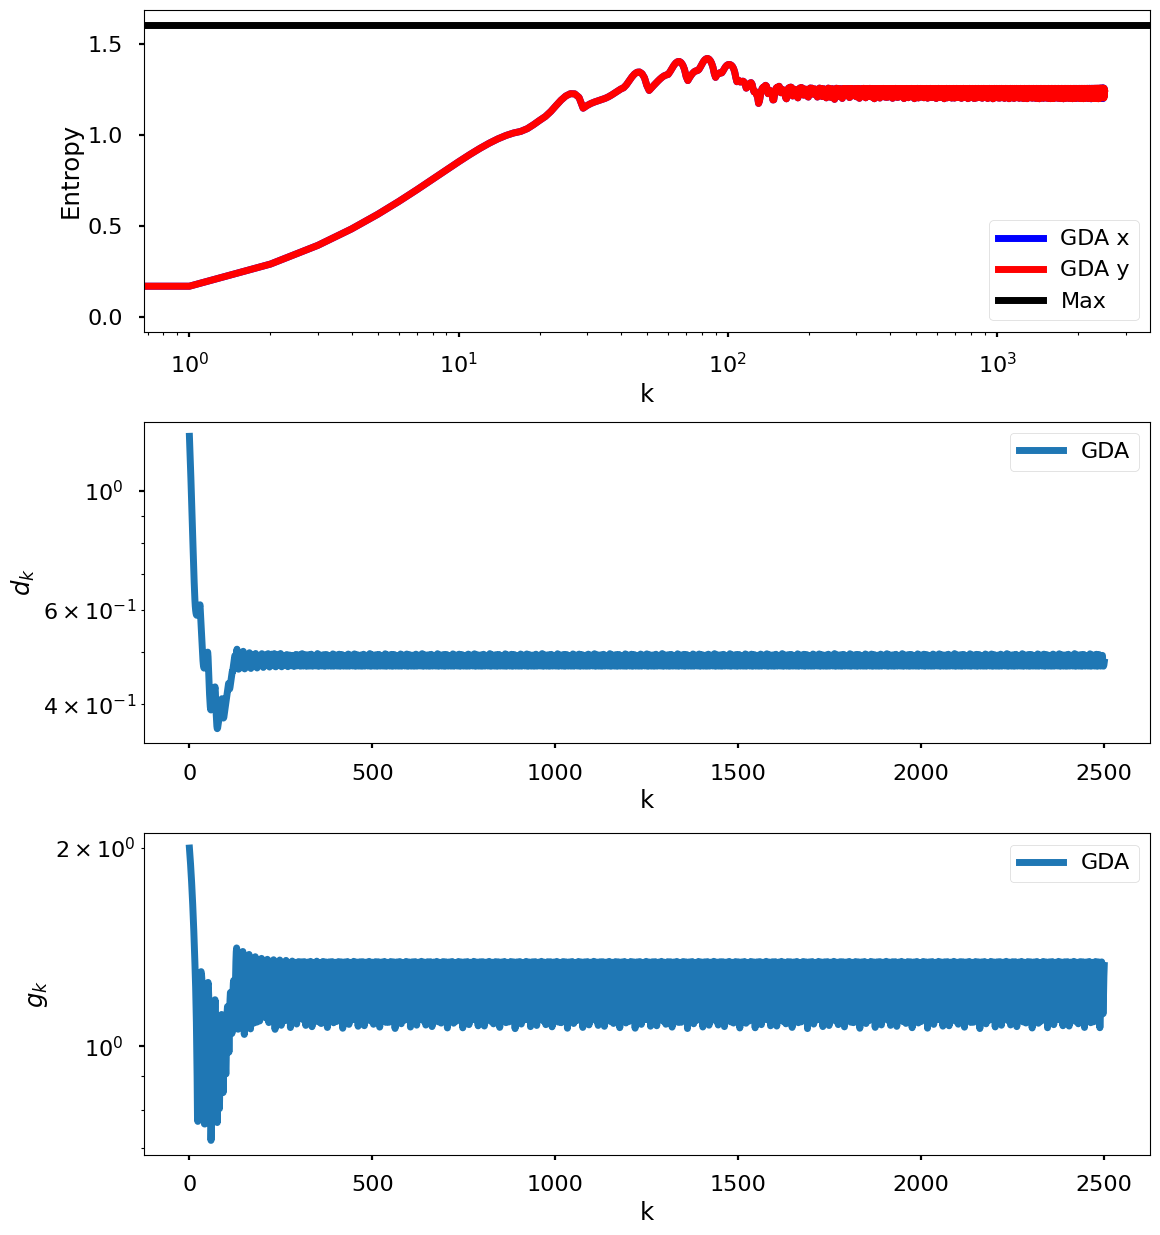

In [9]:
plot_convergence_status(gda_x_sequence, gda_y_sequence)

**(3)** (3 point) What kind of behavior do you observe ? Do the iterates converge ? Play with the step_size and the number of iterations.




Iterates do not converge. All three observed parameters begin to show oscillatory behaviour after some number of iterations.

For simultaneous GDA we observe divergence for all tested step sizes; the step size only changes how the algorithm diverges, not the final outcome.

With a smaller step size, the dynamics evolve slowly and exhibit a more clearly oscillatory behaviour. The entropy increases from the deterministic initial strategy and then stabilizes at a level relatively close to the maximum entropy. This indicates that the strategies remain fairly mixed (the probability mass on the simplex is more evenly spread), even though the distance to the optimum and the duality gap keep increasing and do not return toward zero.

With a larger step size, the iterates move much more aggressively and reach the edges or corners of the simplex very quickly. As a result, the curves for distance and duality gap “stabilize” faster, but they stabilize at large, non-optimal values. Entropy in this case tends to be lower, reflecting that the strategies become more concentrated on a few actions rather than approaching the uniform mix.

In the last plot, we modify the initialization so that the starting strategies are both closer to the Nash equilibrium and not identical. This has two effects. First, the trajectories for the x- and y-players become visually distinguishable in all convergence plots, since they now follow different paths. Second, it illustrates a symmetry property of the game: if we start from identical initial strategies, then by symmetry the dynamics of both players remain the same, and all convergence and path plots for x and y coincide. When the initial points differ, this symmetry is broken, and the two players’ trajectories separate, even though the overall behavior of the algorithm (divergence rather than convergence) remains qualitatively the same.

In summary, for all step sizes the algorithm does not converge to the Nash equilibrium: both the distance to the optimum and the duality gap grow and then saturate at nonzero values. Smaller step sizes produce slower, more oscillatory divergence with relatively high entropy, while larger step sizes produce faster divergence toward sharp, low-entropy strategies.

#### Small step size with large # of iterations

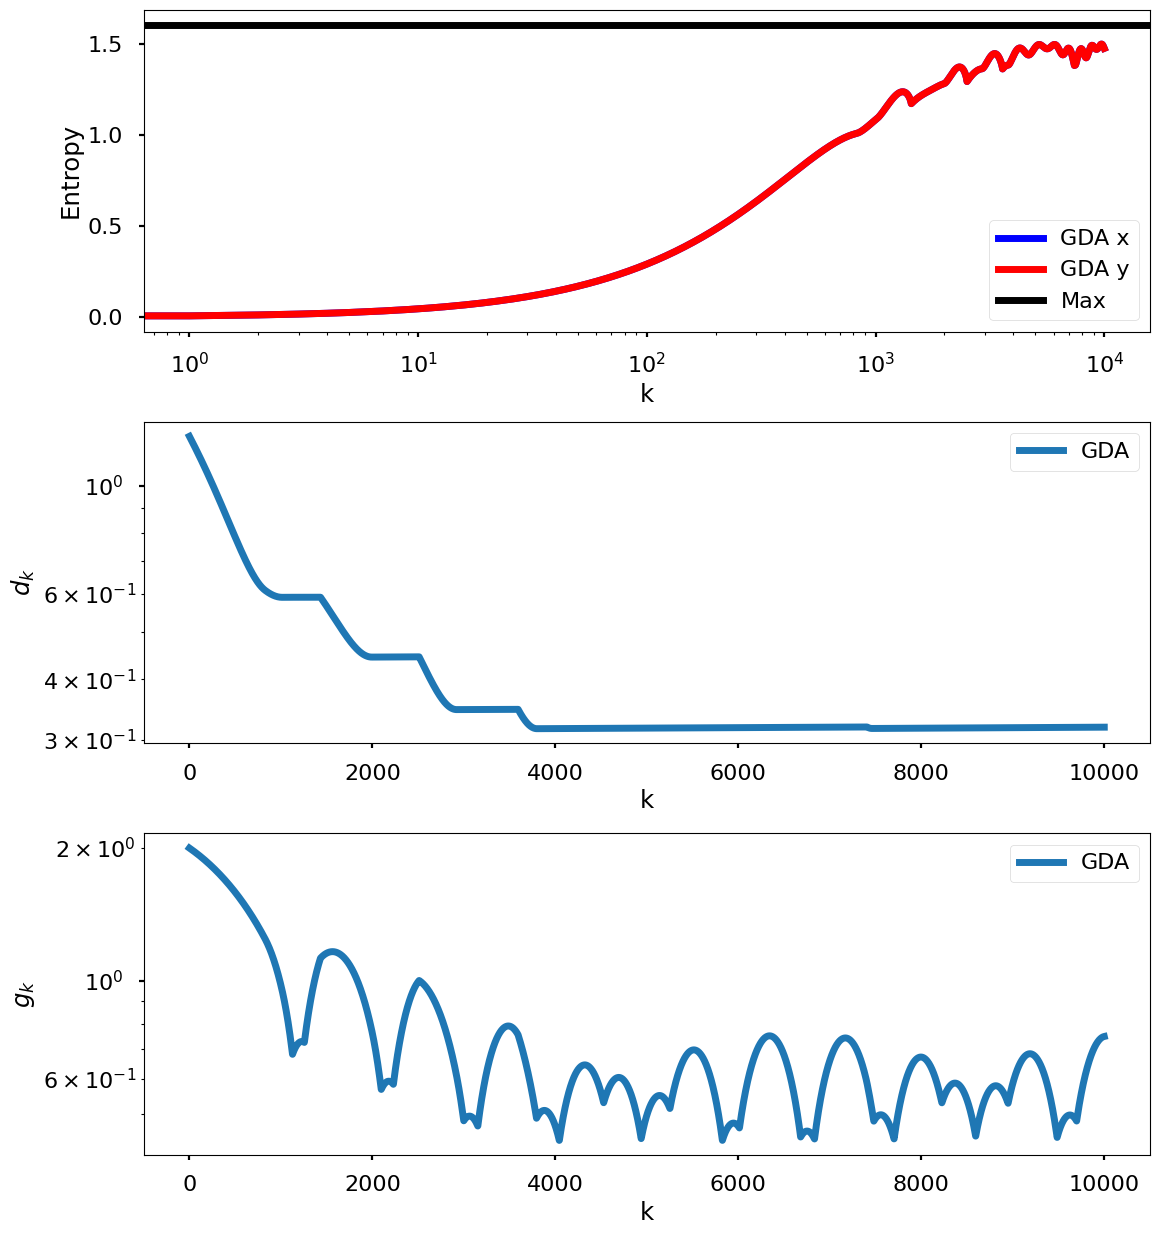

In [10]:
gda_x_sequence_testing, gda_y_sequence_testing = run_alg(GDA, f, x_init, y_init, step_size=0.001, n_iterations=10000)
plot_convergence_status(gda_x_sequence_testing, gda_y_sequence_testing)

#### Large step size with small # of iterations

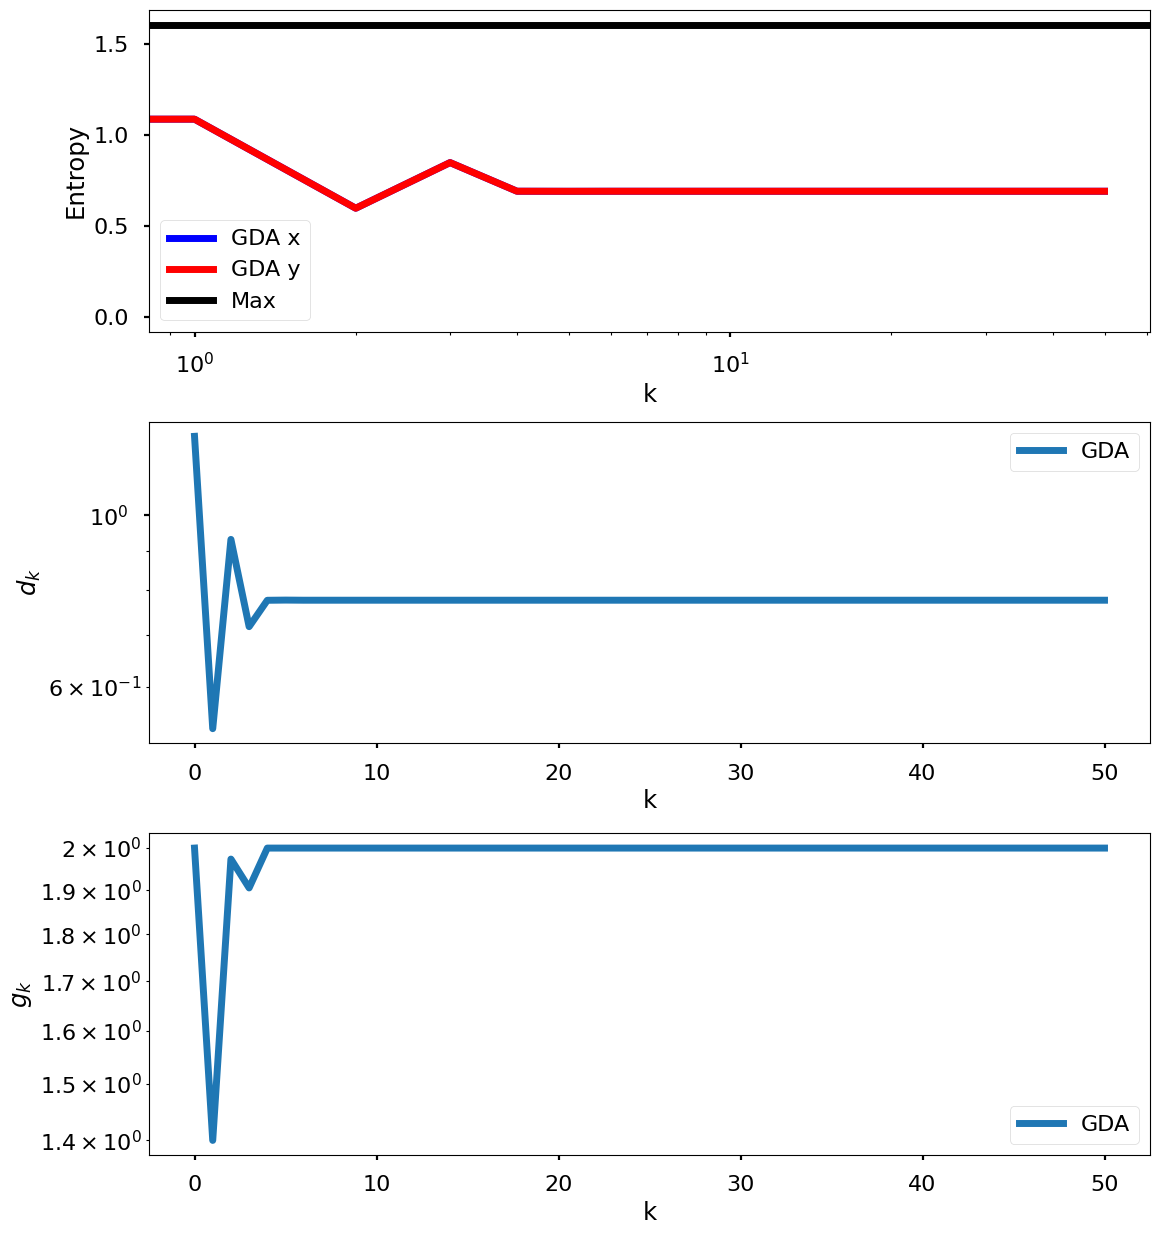

In [11]:
gda_x_sequence_testing, gda_y_sequence_testing = run_alg(GDA, f, x_init, y_init, step_size=0.9, n_iterations=50)
plot_convergence_status(gda_x_sequence_testing, gda_y_sequence_testing)

#### Large step size with large # of iterations

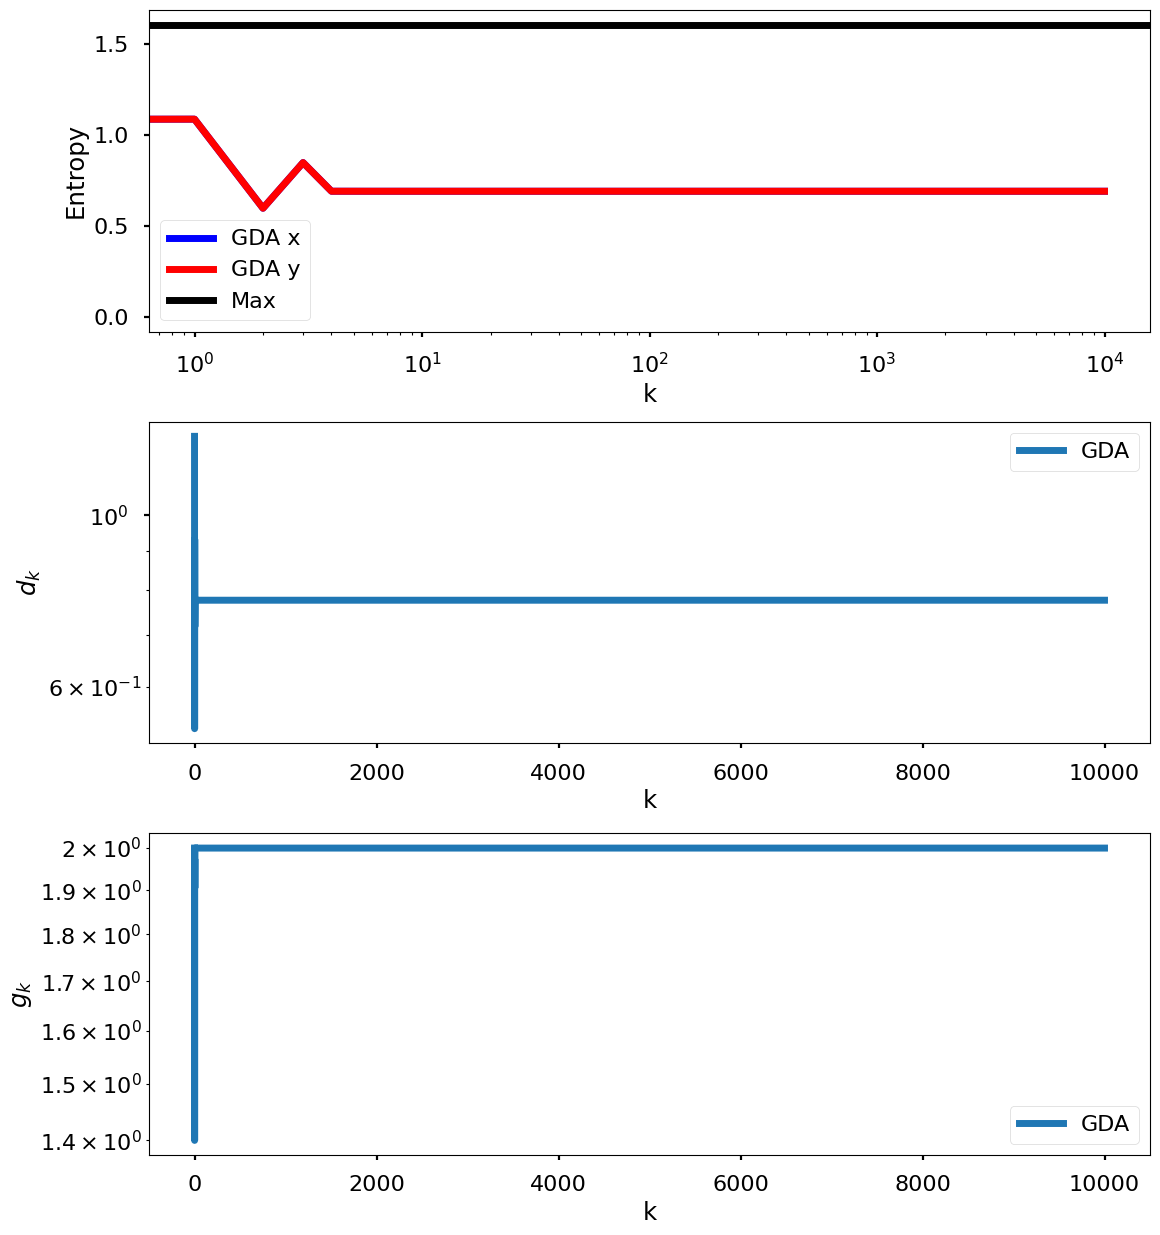

In [12]:
gda_x_sequence_testing, gda_y_sequence_testing = run_alg(GDA, f, x_init, y_init, step_size=0.9, n_iterations=10000)
plot_convergence_status(gda_x_sequence_testing, gda_y_sequence_testing)

#### Initial points near the optimum

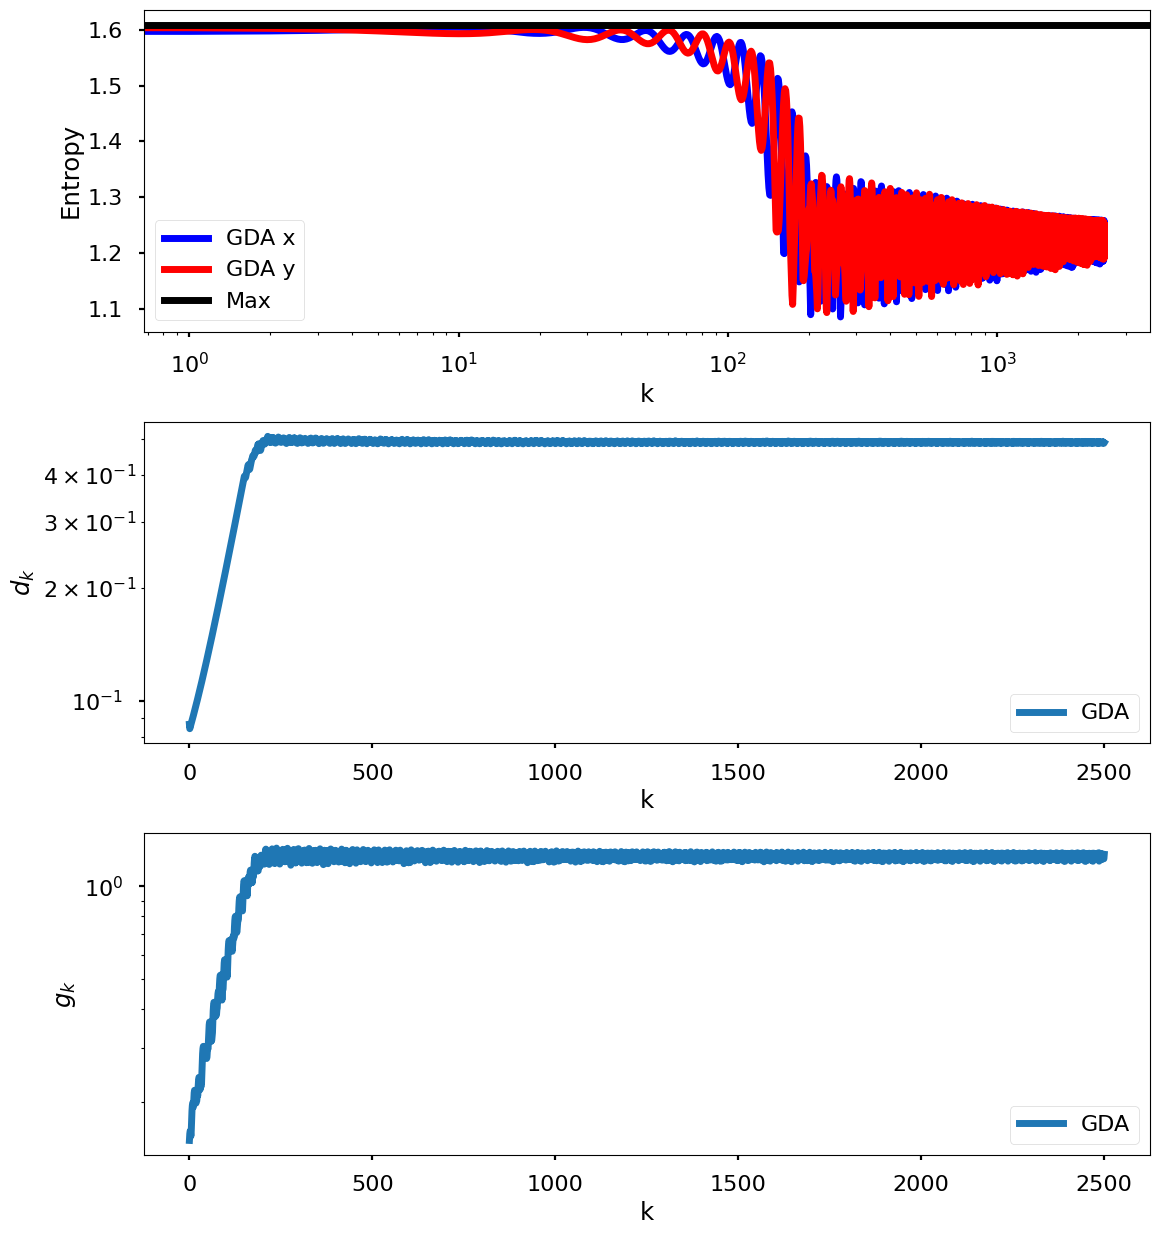

In [13]:
x_init_testing = torch.tensor([0.2, 0.2, 0.2, 0.15, 0.25])
y_init_testing = torch.tensor([0.2, 0.2, 0.2, 0.25, 0.20])

gda_x_sequence_testing, gda_y_sequence_testing = run_alg(GDA, f, x_init_testing, y_init_testing, step_size=0.05, n_iterations=2500)
plot_convergence_status(gda_x_sequence_testing, gda_y_sequence_testing)

**(4)** (4 points) As you've shown both theoretically and in practice, simultaneous Gradient Descent Ascent (sGDA) cannot solve the problem. You will now implement algorithm that can solve bilinear games. We will denote the projection onto the decision space of the x-player and y-player, $\Pi_{\mathcal X}$ and $\Pi_{\mathcal Y}$, respectively.


Let $\mathbf{z}_k = \begin{bmatrix} x_k \\ y_k \end{bmatrix}$, $\Pi(\mathbf{z})=\begin{bmatrix} \Pi_{\mathcal X}(x) \\ \Pi_{\mathcal Y}(y) \end{bmatrix}$ and $G(\mathbf{z}_k) = \begin{bmatrix} \nabla_x f(x_k,y_k) \\ -\nabla_y f(x_k,y_k) \end{bmatrix}$.

Consider the following implicit updates, which is the `Proximal Point Method ` (PPM) for solving the bilinear games:
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{red}{\mathbf{z}_{k+1}})) \nonumber
\end{equation}


Let’s first prove that the Proximal Point Method (PPM) converges in a simple case to build intuition. Consider the aforementioned stylized function $f: \mathbb{R}^2 \to \mathbb{R}$, such that $f(x, y)=xy$, and consider simplified unconstrained probelm, i.e., the projection is the identity map. Prove that PPM converges.

[Hint] Rewrite the implicit update as an explicit update in the form of $z_{k+1} = A z_{k}$ for some matrix $A$.

[Hint] A square matrix $A$ satisfies $\lim_{k \to \infty} A^k = 0$ if its spectral radius $\rho(A) < 1$, where the spectral radius is defined by
$
\rho(A) := \max_i |\lambda_i|,
$
with $\{\lambda_i\}$ denoting the  eigenvalues of $A$.

We look at
$$
f(x,y) = xy, \qquad 
G(z) =
\begin{bmatrix}
\nabla_x f(x,y) \\[2pt]
-\nabla_y f(x,y)
\end{bmatrix}
=
\begin{bmatrix}
y \\[2pt]
- x
\end{bmatrix},
\qquad
z_k =
\begin{bmatrix}
x_k \\[2pt]
y_k
\end{bmatrix}.
$$

The PPM update (without projection) is
$$
z_{k+1} = z_k - \gamma G(z_{k+1}).
$$

In coordinates this means
$$
\begin{bmatrix}
x_{k+1} \\[2pt]
y_{k+1}
\end{bmatrix}
=
\begin{bmatrix}
x_k \\[2pt]
y_k
\end{bmatrix}
- \gamma
\begin{bmatrix}
y_{k+1} \\[2pt]
- x_{k+1}
\end{bmatrix},
$$
which gives the system
$$
\begin{cases}
x_{k+1} = x_k - \gamma y_{k+1},\\[4pt]
y_{k+1} = y_k + \gamma x_{k+1}.
\end{cases}
$$

Now we solve for $x_{k+1}$ and $y_{k+1}$ in terms of $x_k, y_k$.

From the second equation:
$$
y_{k+1} = y_k + \gamma x_{k+1}.
$$

Plug this into the first one:
$$
x_{k+1} = x_k - \gamma(y_k + \gamma x_{k+1})
= x_k - \gamma y_k - \gamma^2 x_{k+1},
$$
so
$$
(1+\gamma^2)x_{k+1} = x_k - \gamma y_k,
$$
and therefore
$$
x_{k+1} = \frac{x_k - \gamma y_k}{1+\gamma^2}.
$$

Now we put this back into the expression for $y_{k+1}$:
$$
y_{k+1} = y_k + \gamma x_{k+1}
= y_k + \gamma \frac{x_k - \gamma y_k}{1+\gamma^2}
= \frac{y_k(1+\gamma^2) + \gamma x_k - \gamma^2 y_k}{1+\gamma^2}
= \frac{y_k + \gamma x_k}{1+\gamma^2}.
$$

So we can write the whole update as
$$
\begin{bmatrix}
x_{k+1} \\[2pt]
y_{k+1}
\end{bmatrix}
=
\frac{1}{1+\gamma^2}
\begin{bmatrix}
1 & -\gamma \\[2pt]
\gamma & 1
\end{bmatrix}
\begin{bmatrix}
x_k \\[2pt]
y_k
\end{bmatrix}.
$$

In other words (writing in a form given in the hint)
$$
z_{k+1} = A z_k, \qquad
A = \frac{1}{1+\gamma^2}
\begin{bmatrix}
1 & -\gamma \\[2pt]
\gamma & 1
\end{bmatrix}.
$$

Let
$$
B =
\begin{bmatrix}
1 & -\gamma \\[2pt]
\gamma & 1
\end{bmatrix},
\quad
A = \frac{1}{1+\gamma^2} B.
$$

We find the eigenvalues of $B$:
$$
\det(B - \lambda I)
= \det
\begin{bmatrix}
1-\lambda & -\gamma \\[2pt]
\gamma & 1-\lambda
\end{bmatrix}
= (1-\lambda)^2 + \gamma^2 = 0.
$$

So we get
$$
(1-\lambda)^2 = -\gamma^2
\quad\Rightarrow\quad
1-\lambda = \pm i\gamma
\quad\Rightarrow\quad
\lambda_B^{\pm} = 1 \mp i\gamma.
$$

Since $A$ is just $B$ scaled, the eigenvalues of $A$ are
$$
\lambda_A^{\pm} = \frac{1 \mp i\gamma}{1+\gamma^2}.
$$

Now we look at their magnitudes:
$$
|\lambda_A^{\pm}|^2
= \frac{1^2 + \gamma^2}{(1+\gamma^2)^2}
= \frac{1}{1+\gamma^2},
$$
so
$$
|\lambda_A^{\pm}| = \frac{1}{\sqrt{1+\gamma^2}} < 1 \quad (\gamma > 0).
$$

This means the spectral radius of $A$ is
$$
\rho(A) = \max_{\pm} |\lambda_A^{\pm}|
= \frac{1}{\sqrt{1+\gamma^2}} < 1.
$$

From what was given in the hint, if $\rho(A) < 1$, then
$$
\lim_{k\to\infty} A^k = 0.
$$

By writing $z_k$ as a function of the initial $z_0$ we get
$$
z_k = A^k z_0,
$$
so
$$
z_k \to 0 \quad \text{as } k \to \infty,
$$
which means
$$
(x_k, y_k) \to (0,0).
$$

Now we check that $(0,0)$ is a saddle point of $f(x,y) = xy$.

First, the gradient is
$$
\nabla f(x,y) =
\begin{bmatrix}
\partial f / \partial x \\[2pt]
\partial f / \partial y
\end{bmatrix}
=
\begin{bmatrix}
y \\[2pt]
x
\end{bmatrix},
$$
so at $(0,0)$ we have
$$
\nabla f(0,0) =
\begin{bmatrix}
0 \\[2pt]
0
\end{bmatrix}.
$$

Also, along the line $y = x$ we get
$$
f(x,x) = x^2 \ge 0,
$$
and along the line $y = -x$ we get
$$
f(x,-x) = -x^2 \le 0.
$$

So in any neighborhood of $(0,0)$ there are points where $f$ is positive and points where $f$ is negative, while the gradient at $(0,0)$ is zero. This means $(0,0)$ is a saddle point of $f(x,y) = xy$.


We can run this algorithm initialized from Sheldon and Leonard's strategies of always playing Spock.

**(5)** (6 points)  In general, computing the next iterate $\mathbf{z}_{k+1}$ in PPM requires you to solve a fixed point problem because we are evaluating the gradient at the unknown next iterate. As this is too costly, we circumvent this difficulty by doing an _extrapolation_ step. The idea behind `ExtraGradient` (EG) is to approximate an implicit update with a more tractable one. Define the half steps:

\begin{equation}
    \mathbf{z}_{k+1/2} = \Pi(\mathbf{z}_k - \gamma G(\mathbf{z}_k)) \nonumber
\end{equation}

These half step extrapolation variables will help us to approximate the implicit iterates. We can then write
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k+1/2}})) \nonumber
\end{equation}
The recursion above defines the ExtraGradient algorithm.

In [14]:
def ExtraGradient(f, x, y, step_size):
    x.grad = None
    y.grad = None
    
    payoff = f(x, y)
    payoff.backward()

    grad_x = x.grad
    grad_y = y.grad

    with torch.no_grad():
        temp_x = (x - step_size * grad_x).detach().requires_grad_(True)
        simplex_project(temp_x)
        temp_y = (y + step_size * grad_y).detach().requires_grad_(True)
        simplex_project(temp_y)
    
    payoff = f(temp_x, temp_y)
    payoff.backward()

    grad_x = temp_x.grad
    grad_y = temp_y.grad

    with torch.no_grad():
        x.add_(-step_size * grad_x)
        simplex_project(x)
        y.add_(step_size * grad_y)
        simplex_project(y)
    
    




In [15]:
eg_x_sequence, eg_y_sequence = run_alg(ExtraGradient, f, x_init, y_init, step_size=0.1, n_iterations=2500)

In [16]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(eg_x_sequence[:, dim_pairs[dim_pair]], 
                  eg_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

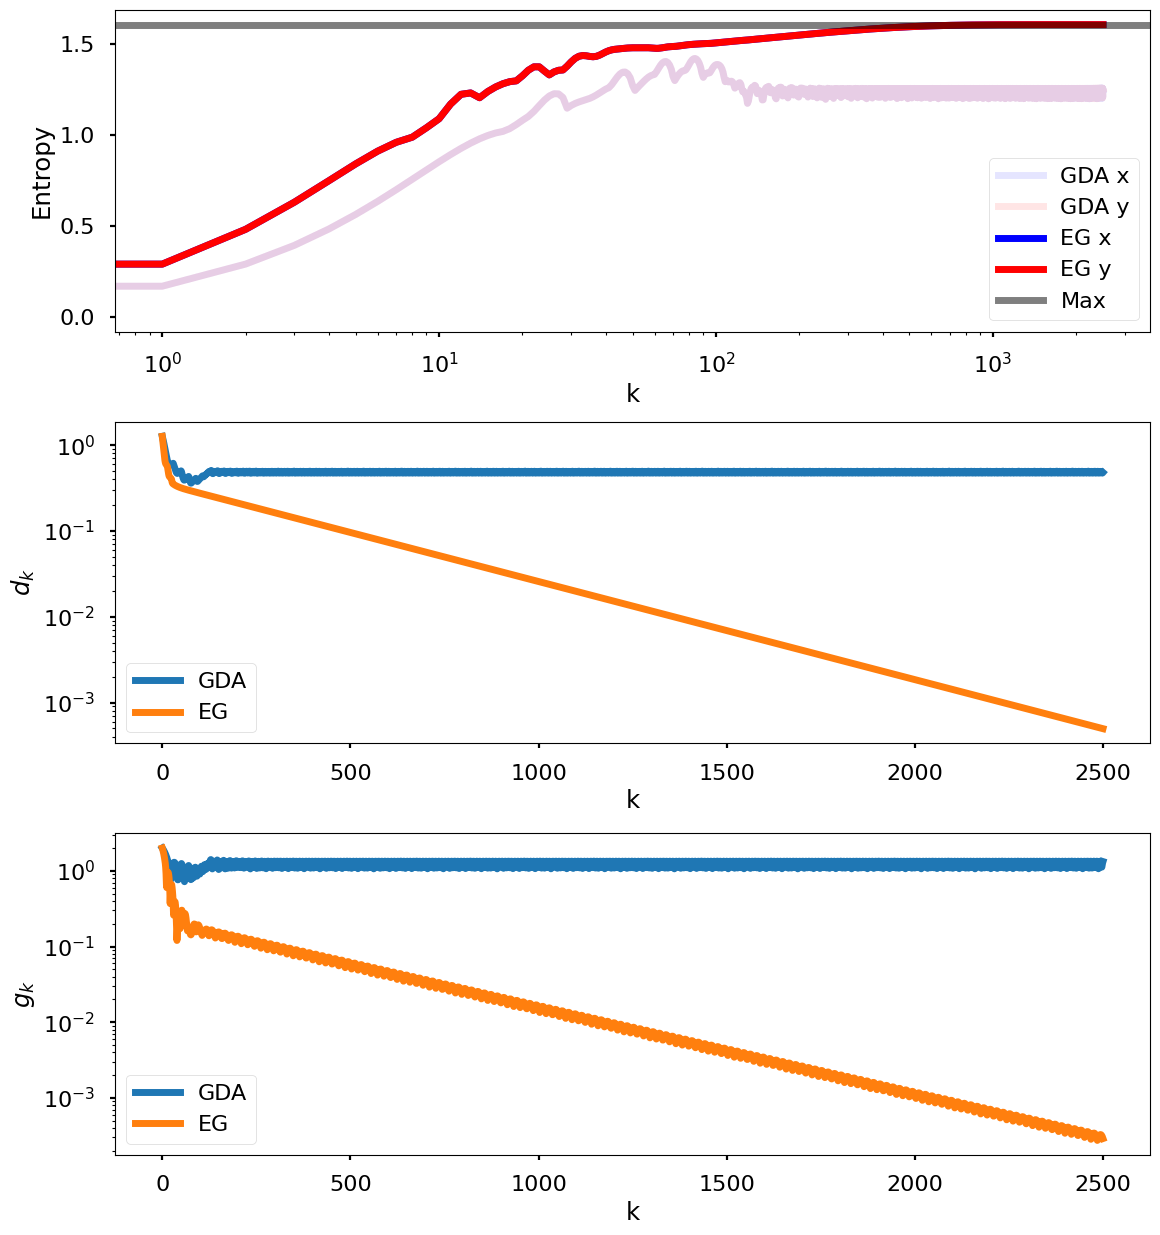

In [17]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', alpha=0.1, label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', alpha=0.1, label="GDA y")
ax[0].plot(range(len(eg_x_sequence)), entropy(eg_x_sequence, axis=1), lw=5, color='b', label="EG x")
ax[0].plot(range(len(eg_y_sequence)), entropy(eg_y_sequence, axis=1), lw=5, color='r', label="EG y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].plot(range(len(eg_x_sequence)), distance_to_opt(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(eg_x_sequence)), duality_gap(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

**(BONUS)** What can you observe about the optimal solution? What properties does the optimal Rock-Paper-Scissors-Lizard-Spock strategy have? Prove that extra-gradient in the bilinear case doesn't diverge like GDA. (Again, candy reward for correct answers!)




**(6)** (10 points) It turns out that we can _generalize_ the ExtraGradient method naturally by striving for a bit more accurate extrapolation. Namely, instead of always performing 1 extrapolation step updating half-iterates before the main parameter update, we can perform $m\geq 1$ fractional steps. Implement this ClairvoyantExtraGradient (CEG) method [1], with the precise update step formulas given below:

\begin{equation}
    \mathbf{z}_{k+1(\color{green}{1/m+1})} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k}})) \\
    \mathbf{z}_{k+1(\color{green}{2/m+1})} = \Pi(\mathbf{z}_{k+1(\color{green}{1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{1/m+1})})) \\
    \vdots \\
    \mathbf{z}_{k+1(\color{green}{m/m+1})} = \Pi(\mathbf{z}_{k+1(\color{green}{m-1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{m-1/m+1})})) \\
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G({\mathbf{z}_{k+1(\color{green}{m/m+1})} })) \nonumber
\end{equation}


[1] Cevher, Volkan, Georgios Piliouras, Ryann Sim, and Stratis Skoulakis. “Min-Max Optimization Made Simple: Approximating the Proximal Point Method via Contraction Maps.” In 2023 Symposium on Simplicity in Algorithms (SOSA), 192–206. Proceedings. Society for Industrial and Applied Mathematics, 2023. https://doi.org/10.1137/1.9781611977585.ch18.

In [18]:
def ClairvoyantExtraGradient(f, x, y, step_size, m=1):
    x.grad = None
    y.grad = None
    
    payoff = f(x, y)
    payoff.backward()

    grad_x = x.grad
    grad_y = y.grad


    temp_x = x.detach().clone().requires_grad_(True)
    temp_y = y.detach().clone().requires_grad_(True)

    for k in range(m):
        temp_x.grad = None
        temp_y.grad = None
        with torch.no_grad():
            temp_x.add_(-step_size * grad_x)
            simplex_project(temp_x)
            temp_y.add_(step_size * grad_y)
            simplex_project(temp_y)
        
        payoff = f(temp_x, temp_y)
        payoff.backward()

        grad_x = temp_x.grad
        grad_y = temp_y.grad

    with torch.no_grad():
        x.add_(-step_size * grad_x)
        simplex_project(x)
        y.add_(step_size * grad_y)
        simplex_project(y)
    

In [19]:
m_values = [1, 2, 3, 5, 10, 25] # You can change this if you wish
ceg_x_sequences, ceg_y_sequences = [], []
for m in m_values:
    print("m =", m)
    step_size = 0.1 if m != 10 else 0.09 # You can change this if you wish
    ceg_x_sequence, ceg_y_sequence = run_alg(ClairvoyantExtraGradient, f, x_init, y_init, 
                                             n_iterations=2500, step_size=step_size, m=m)
    ceg_x_sequences.append(ceg_x_sequence)
    ceg_y_sequences.append(ceg_y_sequence)

m = 1
m = 2
m = 3
m = 5
m = 10
m = 25


In [20]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(L_x, L_y, dim_pair):
    visualize_seq(L_x[:, dim_pairs[dim_pair]], 
                  L_y[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    print("m =", m)
    interact(visualize_seq_slice, L_x=fixed(ceg_x_sequence), L_y=fixed(ceg_y_sequence), dim_pair=SelectionSlider(
        options=range(len(dim_pairs)),
        value=0,
        description="Dim pair:",
        disabled=False,
        continuous_update=False,
        orientation="horizontal",
        readout=True
    ))

m = 1


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 2


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 3


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 5


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 10


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 25


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

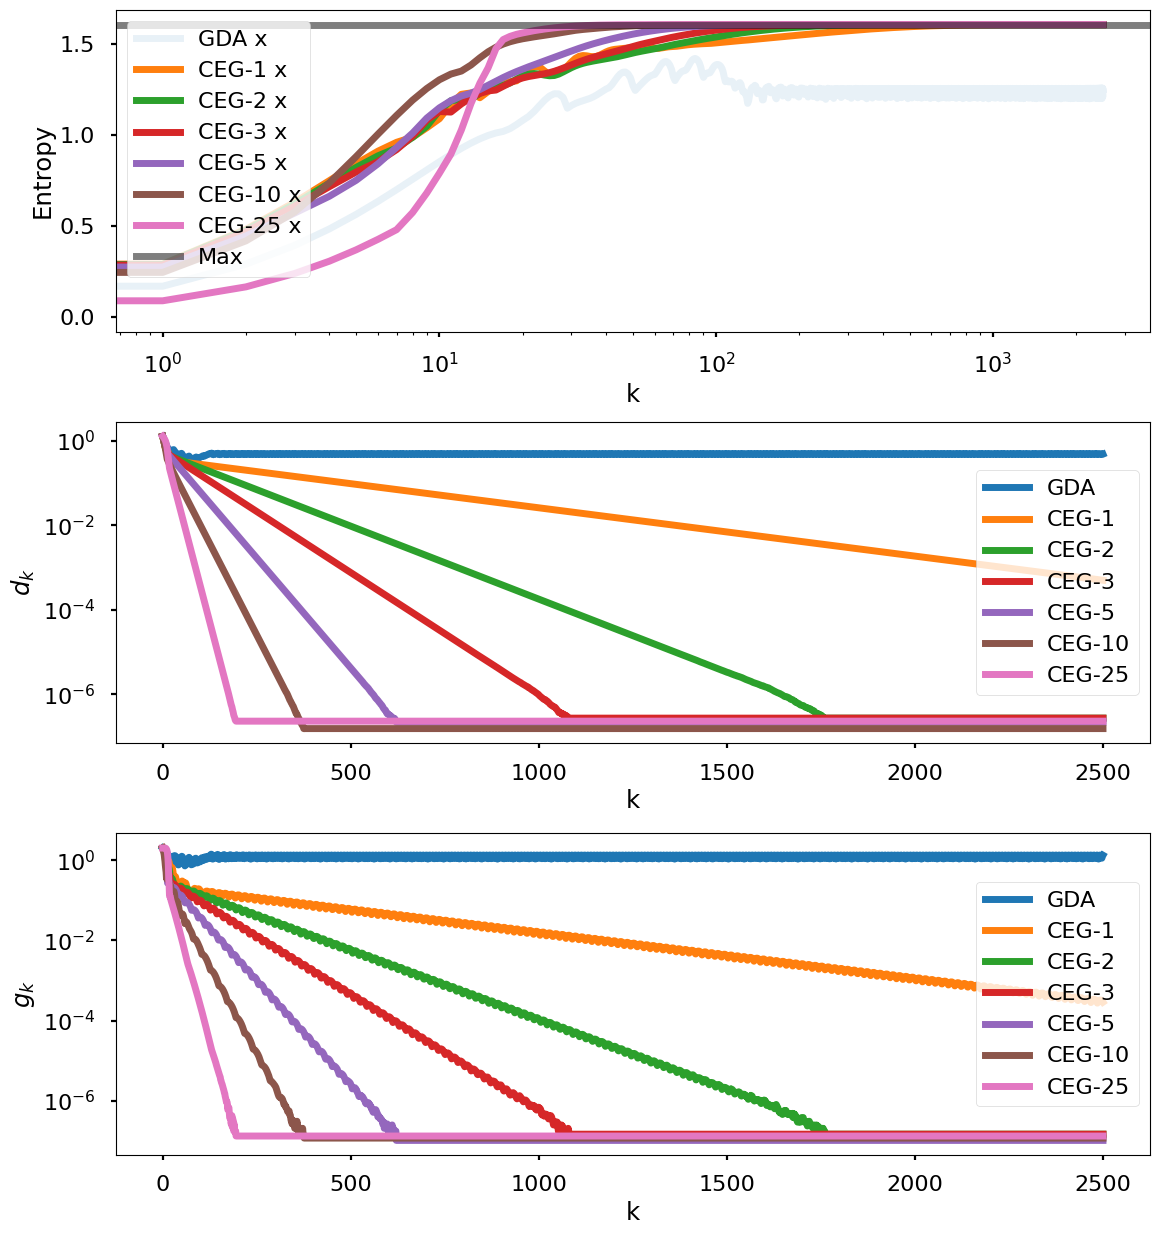

In [21]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, alpha=0.1, label="GDA x")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    ax[0].plot(range(len(ceg_x_sequence)), entropy(ceg_x_sequence, axis=1), lw=5, label=f"CEG-{m} x")
    ax[1].plot(range(len(ceg_x_sequence)), distance_to_opt(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
    ax[2].plot(range(len(ceg_x_sequence)), duality_gap(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()
fig.tight_layout()
plt.show()

**(7)** (5 points) Discuss what you observe for the CEG runs. How do the value of $m$ and the step size influence the convergence and the computation cost? Is there a sweet spot?




In [22]:
ceg_x_sequence, ceg_y_sequence = run_alg(ClairvoyantExtraGradient, f, x_init, y_init, 
                                             n_iterations=2500, step_size=step_size, m=m)

In [23]:
def convergence_iter(distances, eps=1e-3):
    final = distances[-1]
    close = np.where(np.abs(distances - final) < eps)[0]
    if len(close) == 0:
        return len(distances) - 1   # never really got close
    return int(close[0])


In [24]:
import time
ms = np.arange(1, 25, 2)
n_iterations = 2500
step_size = 0.05  

results_time = []
results_conv = []

for m in ms:
    start = time.perf_counter()
    ceg_x_sequence, ceg_y_sequence = run_alg(
        ClairvoyantExtraGradient, f,
        x_init, y_init,
        n_iterations=n_iterations,
        step_size=step_size,
        m=m,
    )
    end = time.perf_counter()
    
    # time per iteration
    time_per_iter = (end - start) / n_iterations
    
    # distance to optimum over time
    d = distance_to_opt(ceg_x_sequence, ceg_y_sequence)
    conv_it = convergence_iter(d, eps=1e-6)

    results_time.append(time_per_iter)
    results_conv.append(conv_it)

# print a small summary
for m, tpi, ci in zip(ms, results_time, results_conv):
    print(f"m={m:2d} | time/iter = {tpi:.6f}s | convergence at iter ≈ {ci}")


m= 1 | time/iter = 0.001742s | convergence at iter ≈ 2500
m= 3 | time/iter = 0.002492s | convergence at iter ≈ 2498
m= 5 | time/iter = 0.002987s | convergence at iter ≈ 2141
m= 7 | time/iter = 0.003892s | convergence at iter ≈ 1497
m= 9 | time/iter = 0.005378s | convergence at iter ≈ 1159
m=11 | time/iter = 0.008450s | convergence at iter ≈ 945
m=13 | time/iter = 0.006316s | convergence at iter ≈ 799
m=15 | time/iter = 0.007969s | convergence at iter ≈ 700
m=17 | time/iter = 0.009531s | convergence at iter ≈ 619
m=19 | time/iter = 0.011636s | convergence at iter ≈ 553
m=21 | time/iter = 0.010938s | convergence at iter ≈ 2500
m=23 | time/iter = 0.011351s | convergence at iter ≈ 1816


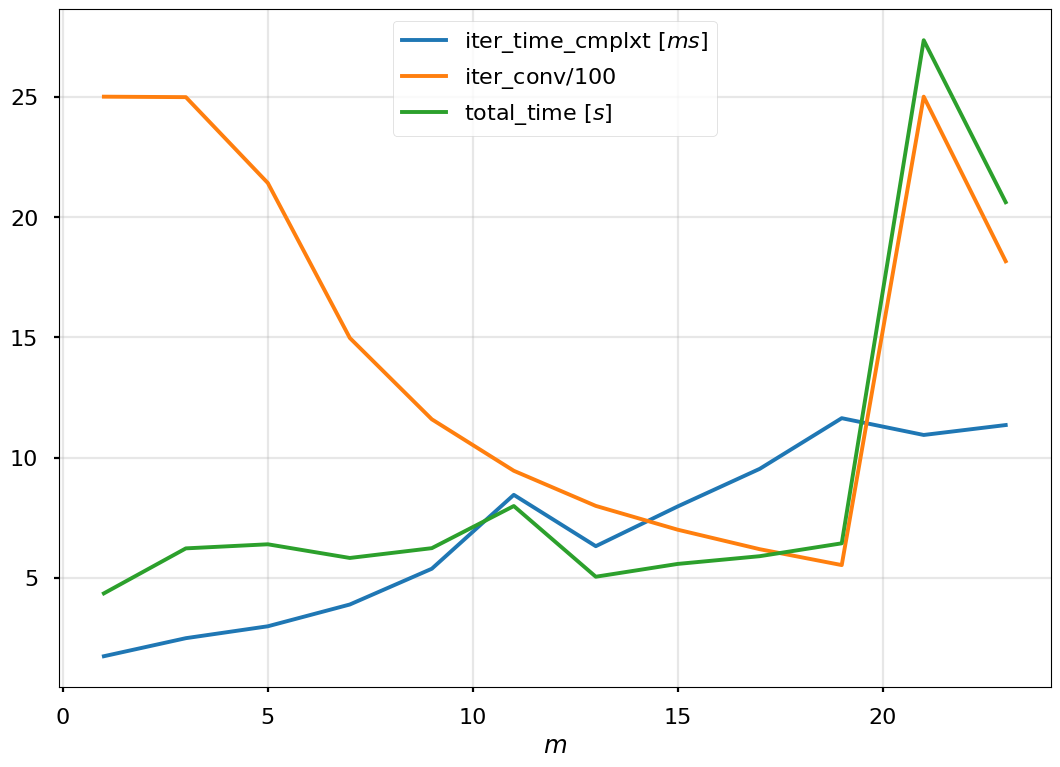

In [25]:
plt.figure()
plt.plot(ms, np.array(results_time)*1000, label=r'iter_time_cmplxt $[ms]$')
plt.plot(ms, np.array(results_conv)/100, label=r'iter_conv$/100$')
plt.plot(ms, np.array(results_conv)*np.array(results_time), label=r'total_time $[s]$')
plt.grid(alpha=0.3)
plt.xlabel(r'$m$')
plt.legend()
plt.show()

In [26]:
import time
m = 2
n_iterations = 2500
step_sizes = np.arange(0.01, 0.4, 0.03)

results_time = []
results_conv = []

for step_size in step_sizes:
    start = time.perf_counter()
    ceg_x_sequence, ceg_y_sequence = run_alg(
        ClairvoyantExtraGradient, f,
        x_init, y_init,
        n_iterations=n_iterations,
        step_size=step_size,
        m=m,
    )
    end = time.perf_counter()
    
    # time per iteration
    time_per_iter = (end - start) / n_iterations
    
    # distance to optimum over time
    d = distance_to_opt(ceg_x_sequence, ceg_y_sequence)
    conv_it = convergence_iter(d, eps=1e-6)

    results_time.append(time_per_iter)
    results_conv.append(conv_it)

# print a small summary
for step_size, tpi, ci in zip(step_sizes, results_time, results_conv):
    print(f"step_size={step_size:.3f} | time/iter = {tpi:.6f}s | convergence at iter ≈ {ci}")


step_size=0.010 | time/iter = 0.003307s | convergence at iter ≈ 2500
step_size=0.040 | time/iter = 0.002335s | convergence at iter ≈ 2500
step_size=0.070 | time/iter = 0.001300s | convergence at iter ≈ 2491
step_size=0.100 | time/iter = 0.001231s | convergence at iter ≈ 1620
step_size=0.130 | time/iter = 0.001428s | convergence at iter ≈ 964
step_size=0.160 | time/iter = 0.001798s | convergence at iter ≈ 635
step_size=0.190 | time/iter = 0.001830s | convergence at iter ≈ 452
step_size=0.220 | time/iter = 0.001553s | convergence at iter ≈ 337
step_size=0.250 | time/iter = 0.001245s | convergence at iter ≈ 259
step_size=0.280 | time/iter = 0.001770s | convergence at iter ≈ 206
step_size=0.310 | time/iter = 0.001946s | convergence at iter ≈ 166
step_size=0.340 | time/iter = 0.002033s | convergence at iter ≈ 496
step_size=0.370 | time/iter = 0.001507s | convergence at iter ≈ 2500
step_size=0.400 | time/iter = 0.001733s | convergence at iter ≈ 2364


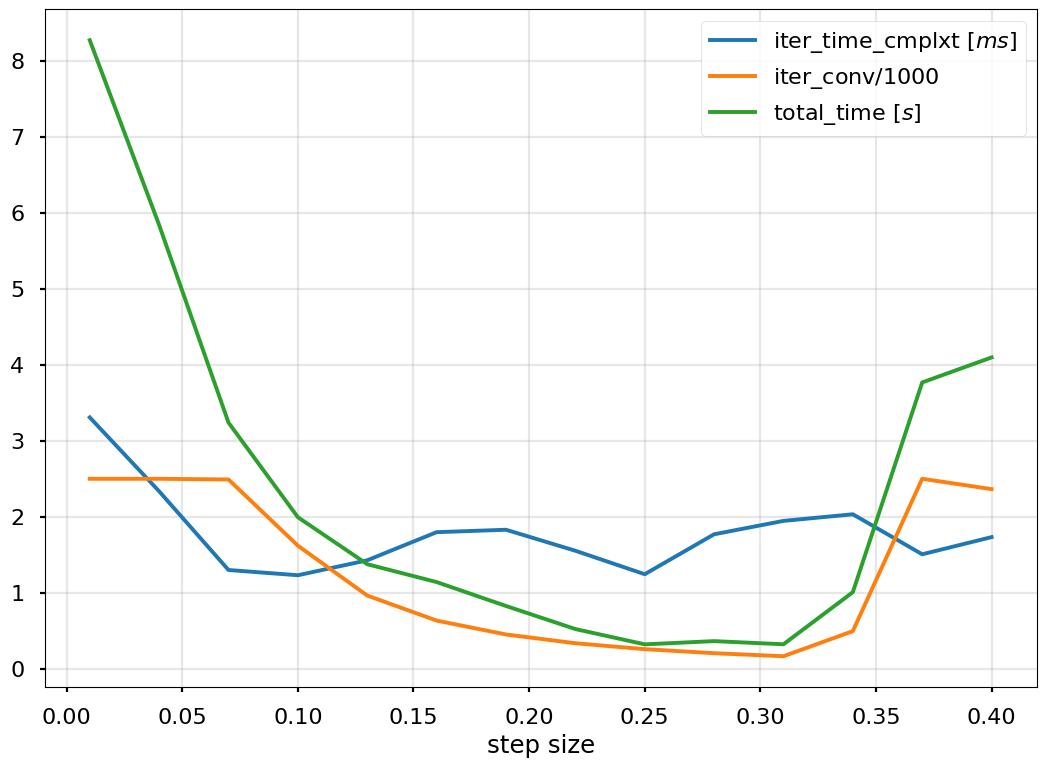

In [27]:
plt.figure()
plt.plot(step_sizes, np.array(results_time)*1000, label=r'iter_time_cmplxt $[ms]$')
plt.plot(step_sizes, np.array(results_conv)/1000, label=r'iter_conv$/1000$')
plt.plot(step_sizes, np.array(results_conv)*np.array(results_time), label=r'total_time $[s]$')
plt.grid(alpha=0.3)
plt.xlabel(r'step size')
plt.legend()
plt.show()

As expected, increasing (m) makes each iteration more expensive (higher runtime per step), but also improves convergence speed in terms of number of iterations. In our experiments, using total convergence time as the metric, the best trade-off turned out to be for minimal m, because total time was the smallest, so $m_{opt} = 1$.
Fixing (m = 1) (noting this is only a heuristic “sweet spot”, since we did not jointly optimize over ($m, \text{step size}$)), we then studied how both the per-iteration time and the number of iterations to converge depend on the step size. As expected, a larger step size generally yields faster convergence, up to a certain point where the convergence speed saturates: beyond that, increasing the step size does not bring noticeable gains and can even slightly worsen the behavior.

The time per iteration (our proxy for time complexity) is essentially independent of the step size and depends mainly on (m).

Note that the described trends are pretty stochastic, as we can see from the plots. Mentioning that some parameter decreases or increases is true from the theoretical part, but from the practical aspect isn't (at least when we run the algorithm only once per each setting) - we could improve the variance by running the algorithm muplitple times, but that would significantly increase the time needed, so it's omitted this time. 

Based on these observations, a reasonable practical choice is $$ m_{opt} = 1$$ and $$\text{step size}_{opt} = 0.3 $$.